Download do dataset

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Carregar os dados em um dataframe do pandas.

In [82]:
url = 'https://raw.githubusercontent.com/Paulosmelo/SI-Data/main/Rice_Osmancik_Cammeo_Dataset.xlsx'
dataset = pd.read_excel(url)
dataset.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


Separar o dataset original para o das classes (y) e atributos (X)

In [83]:
y = dataset['CLASS']
X = dataset.drop(['CLASS'],axis=1)

Dividir em conjunto de treinamento e teste.
Nessa parte, também é possivel dividir um conjunto de validação ou fazer uma validação cruzada.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Arvore de decisão (DT)

Instanciando e treinando com o conjunto de treinamento para o modelo básico da arvore de decisão

In [85]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train);

**Verificando resultado:**

In [86]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.88      0.84      0.86       430
    Osmancik       0.88      0.91      0.89       523

    accuracy                           0.88       953
   macro avg       0.88      0.88      0.88       953
weighted avg       0.88      0.88      0.88       953



In [87]:
print(accuracy_score(y_test, y_pred))

0.8782791185729276


In [88]:
error = []

for i in range(2, 80):  
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    pred_i = tree.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

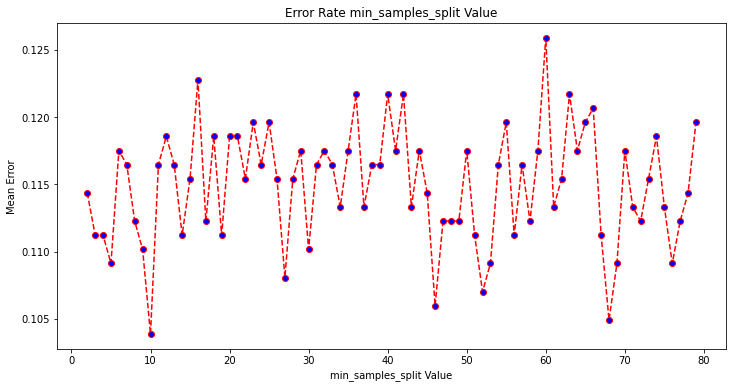

In [89]:
plt.figure(figsize=(12, 6))  
plt.plot(range(2, 80), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=6)
plt.title('Error Rate min_samples_split Value')  
plt.xlabel('min_samples_split Value')  
plt.ylabel('Mean Error') 

**Analisando a arvore de decisão**

In [90]:
params = {
    'criterion': ['gini','entropy'],
    'splitter': ['random', 'best'],
    'min_samples_split': [2,5,6,10,20,70,80],
    'min_samples_leaf': [1,2,5,7,9,10,20,30,60],
    'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3,0.4,0.5]
}

In [91]:
gridS = GridSearchCV(estimator=tree,param_grid=params)
gridS.fit(X_train,y_train)
grid_results = pd.concat([pd.DataFrame(gridS.cv_results_["params"]),pd.DataFrame(gridS.cv_results_["mean_test_score"], columns=["accuracy"])],axis=1)
grid_results.sort_values(by=['accuracy'], inplace=True)

A seguir vamos verificar os resultados, ordenados com base na acurácia, de algumas combinações dos valores armazenados nos parâmetros descritos anteriormente

In [92]:
grid_results

,criterion,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
382,gini,9,10,0.5,random,0.579979
826,entropy,1,70,0.5,random,0.579979
1198,entropy,10,5,0.5,random,0.579979
106,gini,2,5,0.5,random,0.579979
226,gini,5,20,0.5,random,0.579979
...,...,...,...,...,...,...
1296,entropy,20,10,0.0,random,0.922997
540,gini,20,10,0.0,random,0.924050
468,gini,10,20,0.0,random,0.925100
1176,entropy,10,2,0.0,random,0.926149


Vamos verificar o melhor e o pior resultado da combinação dos valores dos parâmetros

**Melhor resultado:**

In [93]:
best_result = grid_results[grid_results['accuracy'] == grid_results['accuracy'].max()]
best_result.head()

,criterion,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
1380,entropy,30,10,0.0,random,0.926151


**Pior resultado:**

In [94]:
worse_result = grid_results[grid_results['accuracy'] == grid_results['accuracy'].min()]
worse_result.head()

,criterion,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,accuracy
382,gini,9,10,0.5,random,0.579979
826,entropy,1,70,0.5,random,0.579979
1198,entropy,10,5,0.5,random,0.579979
106,gini,2,5,0.5,random,0.579979
226,gini,5,20,0.5,random,0.579979


**Conclusões**

1. **Entropy** ou **gini** não apresenta grandes diferenças na divisão entre os dois;
2. Apesar de não apresentarem uma diferença muito grande, o metodo **best** é minimamente mais consistente que o metodo **random**, tendo uma valor mínimo de acurácia acima de 72%;
3. Ao aumentar o valor de **min_samples_split** a tendencia é que a eficiencia diminua, porém a accurancy aumenta de forma significativa. Após 72 a taxa de erro se fixou em um valor bem baixo;
4. Ao aumentar o valor de **min_samples_leaf** a tendencia é que a eficiencia diminua. Ao chegar em 45 obtivemos as menores taxas de erros e melhores resultados, porém, depois de 53 a taxa de erro começou a aumentar;
5. Ao aumentar o valor de **min_weight_fraction_leaf** a tendencia é que a eficiencia diminua;


